# Imports

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Two-dimensional Distribution for θ

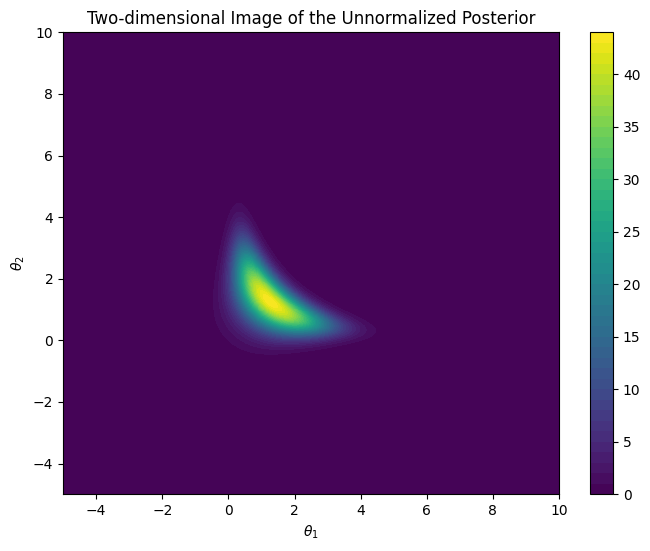

In [31]:
# Define the unnormalized posterior distribution function
def unnormalized_posterior(theta1, theta2):
    return np.exp(-0.5 * (theta1**2 * theta2**2 + theta1**2 + theta2**2 - 2*theta1*theta2 - 4*theta1 - 4*theta2))

# Create a grid of theta values
theta1 = np.linspace(-5, 10, 400)
theta2 = np.linspace(-5, 10, 400)
Theta1, Theta2 = np.meshgrid(theta1, theta2)

# Compute the unnormalized posterior for each pair of theta values
Z = unnormalized_posterior(Theta1, Theta2)

# Plot the two-dimensional image of the distribution
plt.figure(figsize=(8, 6))
contour = plt.contourf(Theta1, Theta2, Z, 50, cmap='viridis')
plt.colorbar(contour)
plt.title('Two-dimensional Image of the Unnormalized Posterior')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')
plt.show()

# Metropolis Algorithm

In [34]:
def metropolis_sampler(initial_theta, num_samples, burn_in, target_fn, proposal_std):

    # Initialize the Markov chain with the initial state
    theta = initial_theta
    samples = []
    accept_count = 0
    
    # 11,000 total iterations
    for iteration in range(num_samples + burn_in):
        # Propose a new state by adding a random perturbation to the current state
        theta_prime = np.random.normal(theta, proposal_std)
        
        # Get target distribution values for the current and proposed states
        p_theta = target_fn(*theta)
        p_theta_prime = target_fn(*theta_prime)
        
        # Compute the acceptance probability
        alpha = min(1, p_theta_prime / p_theta)
        
        # Move criteria
        if alpha > np.random.rand():
            theta = theta_prime
            if iteration >= burn_in:
                accept_count += 1
        
        # Append to samples after the burn-in period is over
        if iteration >= burn_in:
            samples.append(theta)
    
    acceptance_rate = accept_count / num_samples
    
    return np.array(samples), acceptance_rate

initial_theta = np.array([0.0, 0.0])
num_samples = 10000
burn_in = 1000
proposal_std = np.array([0.95, 0.95])
samples, acceptance_rate = metropolis_sampler(initial_theta, num_samples, burn_in, unnormalized_posterior, proposal_std)
print(f"Acceptance rate: {acceptance_rate}")

Acceptance rate: 0.4005


# Scale and Acceptance Rate

A scale, represented as a normal distribution with a standard deviation of `0.95`, results in an acceptance rate of around `0.40`. Empirically, the actual recorded acceptance rate of the last run was `0.4005`. 

# Visual of Sampled Points Over Two-Dimensional Image

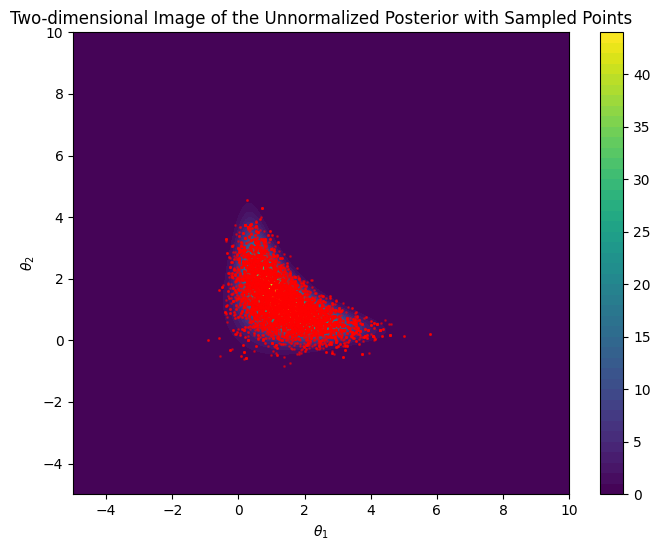

In [35]:
# Plot the two-dimensional image of the distribution
plt.figure(figsize=(8, 6))
contour = plt.contourf(Theta1, Theta2, Z, 50, cmap='viridis')
plt.colorbar(contour)
plt.title('Two-dimensional Image of the Unnormalized Posterior with Sampled Points')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')

# Overlay the sampled points
plt.scatter(samples[:, 0], samples[:, 1], color='red', alpha=0.5, s=1)

plt.show()

# Marginal Densities of the Two Parameters

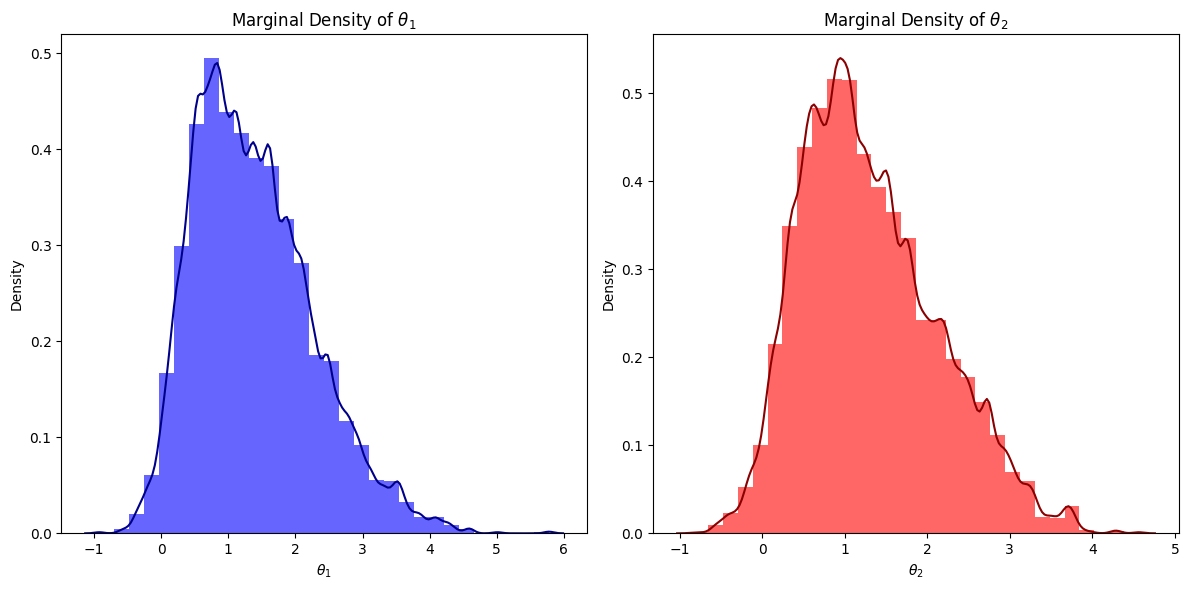

In [36]:
theta1_samples = samples[:, 0]
theta2_samples = samples[:, 1]

# Plot histograms for the marginal densities
plt.figure(figsize=(12, 6))

# Histogram for theta1
plt.subplot(1, 2, 1)
plt.hist(theta1_samples, bins=30, density=True, alpha=0.6, color='blue')
sns.kdeplot(theta1_samples, bw_adjust=0.5, color='darkblue')
plt.title('Marginal Density of $\\theta_1$')
plt.xlabel('$\\theta_1$')
plt.ylabel('Density')

# Histogram for theta2
plt.subplot(1, 2, 2)
plt.hist(theta2_samples, bins=30, density=True, alpha=0.6, color='red')
sns.kdeplot(theta2_samples, bw_adjust=0.5, color='darkred')
plt.title('Marginal Density of $\\theta_2$')
plt.xlabel('$\\theta_2$')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# 95% Equi-Tailed Credible Intervals for Each Parameter

In [37]:
theta1_samples = samples[:, 0]
theta2_samples = samples[:, 1]

# Calculate the 95% credible intervals for theta1 and theta2
theta1_ci = np.percentile(theta1_samples, [2.5, 97.5])
theta2_ci = np.percentile(theta2_samples, [2.5, 97.5])

# Print the results
print(f"95% credible interval for θ1: {theta1_ci}")
print(f"95% credible interval for θ2: {theta2_ci}")

95% credible interval for θ1: [0.01821432 3.43504868]
95% credible interval for θ2: [0.00531172 3.10526061]
